# Compression Ratio Estimation for Different CFGs

In [1]:
import math
import numpy as np
import matplotlib.figure as fig
import matplotlib.pyplot as plt

from Nodecount_Estimate import nodecount_estimate
from Hitratio_Estimate import hitratio_estimate

Fname=["astro", "blast2_p", "bump", "dpot", "eddy", "fish", "sedov_p", "yf17_p", "yf17_t"]
Fsize = [524288,4631040,445536,165552,2260928,524288,625152,776832,776832]
error_bound = [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0]
point_count = [65536,578880,55692,20694,282616,65536,78144,97104,97104]
quantization_factors = 2097152

#########################################
# Original compression metrics
# - only for result comparison. Not used in estimation

NodeCount = []
with open("NodeCount.txt","r") as file:
    for line in file:
        ts_tmp = line.split(",")
        for t in range(0,len(ts_tmp)):
            ts_tmp[t] = np.int(ts_tmp[t])
#         print(ts_tmp)
        NodeCount.append(np.array(ts_tmp))
NodeCount = np.array(NodeCount)

TreeSize = []
with open("TreeSize.txt","r") as file:
    for line in file:
        ts_tmp = line.split(",")
        for t in range(0,len(ts_tmp)):
            ts_tmp[t] = np.int(ts_tmp[t])
#         print(ts_tmp)
        TreeSize.append(np.array(ts_tmp))
TreeSize = np.array(TreeSize)

EncodeSize= []
with open("EncodeSize.txt","r") as file:
    for line in file:
        ts_tmp = line.split(",")
        for t in range(0,len(ts_tmp)):
            ts_tmp[t] = np.int(ts_tmp[t])
#         print(ts_tmp)
        EncodeSize.append(np.array(ts_tmp))
EncodeSize = np.array(EncodeSize)

OutlierCount = []
with open("OutlierCount.txt","r") as file:
    for line in file:
        ts_tmp = line.split(",")
        for t in range(0,len(ts_tmp)):
            ts_tmp[t] = np.int(ts_tmp[t])
#         print(ts_tmp)
        OutlierCount.append(np.array(ts_tmp))
OutlierCount = np.array(OutlierCount)

OutlierSize = []
with open("OutlierSize.txt","r") as file:
    for line in file:
        ts_tmp = line.split(",")
        for t in range(0,len(ts_tmp)):
            ts_tmp[t] = np.int(ts_tmp[t])
#         print(ts_tmp)
        OutlierSize.append(np.array(ts_tmp))
OutlierSize = np.array(OutlierSize)

TotalSize = []
with open("TotalSize_new.txt","r") as file:
    for line in file:
        ts_tmp = line.split(",")
        for t in range(0,len(ts_tmp)):
            ts_tmp[t] = np.int(ts_tmp[t])
#         print(ts_tmp)
        TotalSize.append(np.array(ts_tmp))
TotalSize = np.array(TotalSize)

CR = []
with open("CR.txt","r") as file:
    for line in file:
        ts_tmp = line.split(",")
        for t in range(0,len(ts_tmp)):
            ts_tmp[t] = np.float(ts_tmp[t])
#         print(ts_tmp)
        CR.append(np.array(ts_tmp))
CR = np.array(CR)

x = np.arange(0,12)

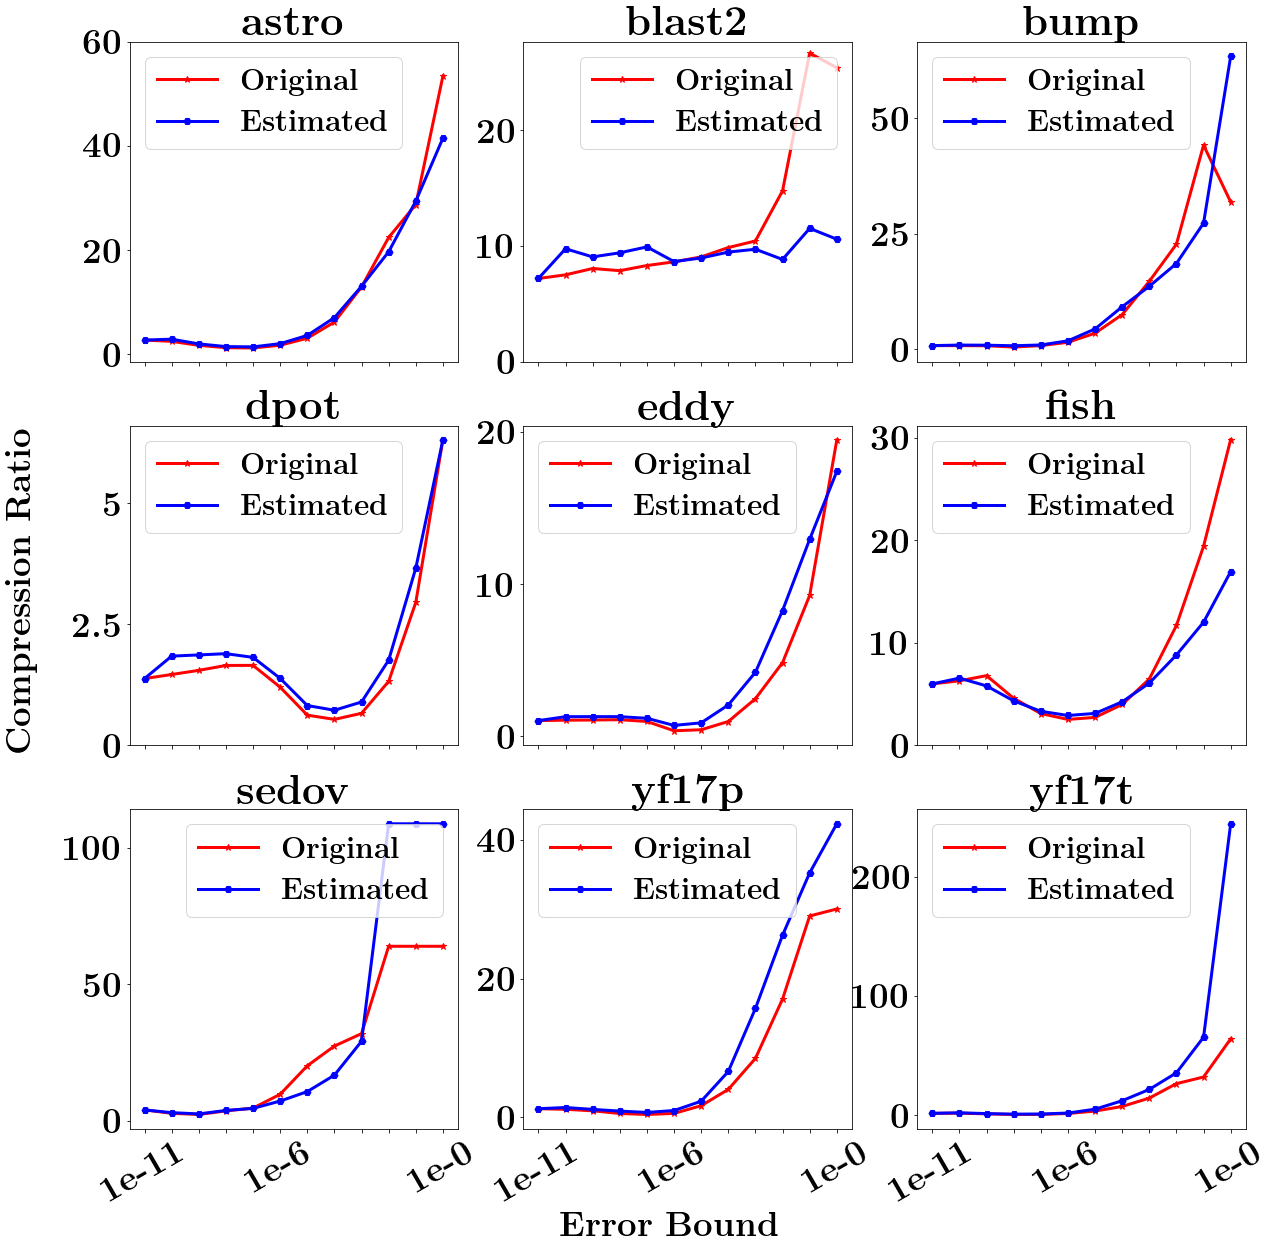

In [2]:
# Estimation for all data
# Estimation goes from 1e-11 to 1e-0
#########################################
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['cm'],'size':35})
plt.rc('legend', fontsize=30)

fig, axearr = plt.subplots(3,3,sharex =True,figsize = (20,20))
# plt.xticks(rotation=30)
axearr[0][0].set_xticks(x)
axearr[0][0].set_xticklabels([r"\textbf{1e-11}","","","","",r"\textbf{1e-6}","","","","","",r"\textbf{1e-0}"])

for i in range(0,len(Fname)):
#     print(Fname[i])
    hr_e, hitratio_o = hitratio_estimate(Fname[i]) # 1*12
    nc_e = nodecount_estimate(Fname[i]) # 1*12
    
    hr_e = np.array(hr_e)
    nc_e = np.array(nc_e)
    nc_e = nc_e[::-1] # re-arrange from 1e-11 to 1e-0
    nc_e = 1.8*nc_e
    nc_e[0] = NodeCount[i][0]
    # 1*12
    ts_e = TreeSize[i][0]*(nc_e/NodeCount[i][0])
    es_e = EncodeSize[i][0]*(np.log2(nc_e)/np.log2(NodeCount[i][0]))
    
    oc_e = point_count[i]*(1-hr_e)
    os_e = OutlierSize[i][0]*(oc_e/OutlierCount[i][0])
    os_e = 0.8*OutlierSize[i]

    total_e = ts_e + es_e + os_e
    Total_e = TreeSize[i]+EncodeSize[i]+OutlierSize[i] 
    cr_e = Fsize[i]/total_e
#     cr_e[0] = CR[i][0]
    cr_e[0] = Fsize[i]/Total_e[0]
    axearr[int(i/3)][i%3].plot(x,Fsize[i]/Total_e,'r*-',linewidth=3,markersize=7,label=r"\textbf{Original}")
    axearr[int(i/3)][i%3].plot(x,cr_e,'bH-',linewidth=3,markersize=7,label=r"\textbf{Estimated}")
    axearr[int(i/3)][i%3].legend(loc='best')

axearr[0,0].set_title(r"\textbf{astro}")
axearr[0,0].set_yticks([0,20,40,60])
axearr[0,0].set_yticklabels([r'\textbf{0}',r'\textbf{20}',r'\textbf{40}',r'\textbf{60}'])

axearr[0,1].set_title(r"\textbf{blast2}")
axearr[0,1].set_yticks([0,10,20])
axearr[0,1].set_yticklabels([r'\textbf{0}',r'\textbf{10}',r'\textbf{20}'])


axearr[0,2].set_title(r"\textbf{bump}")
axearr[0,2].set_yticks([0,25,50])
axearr[0,2].set_yticklabels([r'\textbf{0}',r'\textbf{25}',r'\textbf{50}'])

axearr[1,0].set_title(r"\textbf{dpot}")
axearr[1,0].set_yticks([0,2.5,5])
axearr[1,0].set_yticklabels([r'\textbf{0}',r'\textbf{2.5}',r'\textbf{5}'])


axearr[1,1].set_title(r"\textbf{eddy}")
axearr[1,1].set_yticks([0,10,20])
axearr[1,1].set_yticklabels([r'\textbf{0}',r'\textbf{10}',r'\textbf{20}'])

axearr[1,2].set_title(r"\textbf{fish}")
axearr[1,2].set_yticks([0,10,20,30])
axearr[1,2].set_yticklabels([r'\textbf{0}',r'\textbf{10}',r'\textbf{20}',r'\textbf{30}'])

axearr[2,0].set_title(r"\textbf{sedov}")
axearr[2,0].set_yticks([0,50,100])
axearr[2,0].set_yticklabels([r'\textbf{0}',r'\textbf{50}',r'\textbf{100}'])


axearr[2,1].set_title(r"\textbf{yf17p}")
axearr[2,1].set_yticks([0,20,40])
axearr[2,1].set_yticklabels([r'\textbf{0}',r'\textbf{20}',r'\textbf{40}'])


axearr[2,2].set_title(r"\textbf{yf17t}")
axearr[2,2].set_yticks([0,100,200])
axearr[2,2].set_yticklabels([r'\textbf{0}',r'\textbf{100}',r'\textbf{200}'])

plt.setp(axearr[2][0].get_xticklabels(), rotation=30)
plt.setp(axearr[2][1].get_xticklabels(), rotation=30)
plt.setp(axearr[2][2].get_xticklabels(), rotation=30)

fig.text(0.5, 0.05, r"\textbf{Error Bound}", ha='center')
fig.text(0.04, 0.5, r"\textbf{Compression Ratio}", va='center', rotation=90)

plt.savefig('CompressionRatio_cfg.pdf')
plt.show()
plt.clf()

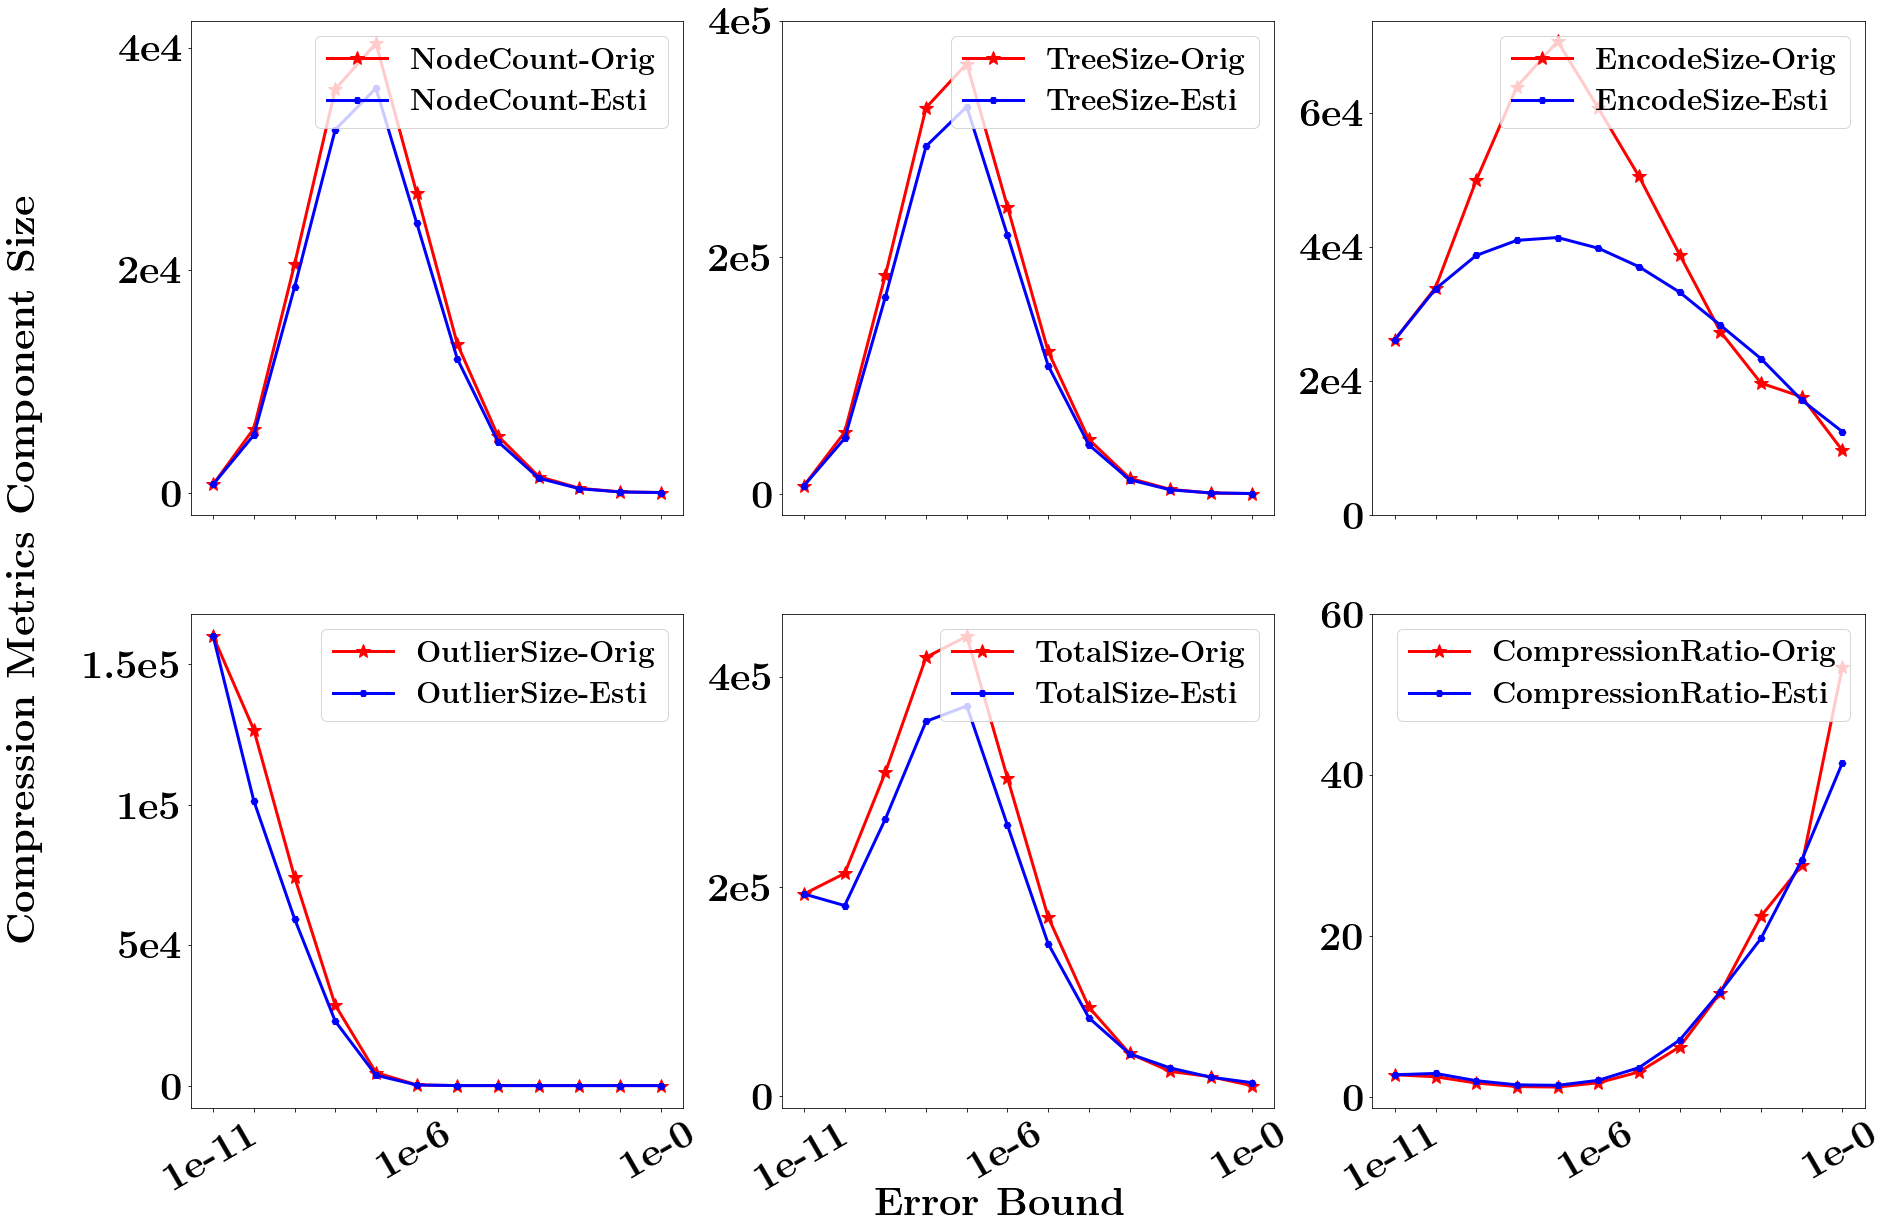

In [4]:
# Metrics Estimation
i = 0
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['cm'],'size':40})
plt.rc('legend', fontsize=30)
x = np.arange(0,12)
fig, axearr = plt.subplots(2,3,sharex =True,figsize = (30,20))
# plt.xticks(rotation=30)
axearr[0][0].set_xticks(x)
axearr[0][0].set_xticklabels([r"\textbf{1e-11}","","","","",r"\textbf{1e-6}","","","","","",r"\textbf{1e-0}"])

hr_e, hitratio_o = hitratio_estimate(Fname[i]) # 1*12
nc_e = nodecount_estimate(Fname[i]) # 1*12

hr_e = np.array(hr_e)
nc_e = np.array(nc_e)
nc_e = nc_e[::-1] # re-arrange from 1e-11 to 1e-0
nc_e = 1.8*nc_e
nc_e[0] = NodeCount[i][0]
# 1*12
ts_e = TreeSize[i][0]*(nc_e/NodeCount[i][0])
ts_e[0] = TreeSize[i][0]
es_e = EncodeSize[i][0]*(np.log2(nc_e)/np.log2(NodeCount[i][0]))
es_e[0] = EncodeSize[i][0]

oc_e = point_count[i]*(1-hr_e)
os_e = OutlierSize[i][0]*(oc_e/OutlierCount[i][0])
os_e = 0.8*OutlierSize[i]
os_e[0] = OutlierSize[i][0]
total_e = ts_e + es_e + os_e
Total_e = TreeSize[i]+EncodeSize[i]+OutlierSize[i]

nc_e[0] = NodeCount[i][0]
cr_e = Fsize[i]/total_e
#     cr_e[0] = CR[i][0]
# cr_e[0] = Fsize[i]/Total_e[0]


axearr[0][0].plot(x,NodeCount[i],'r*-',linewidth=3,markersize=15,label=r"\textbf{NodeCount-Orig}")
axearr[0][0].plot(x,nc_e,'bH-',linewidth=3,markersize=7,label=r"\textbf{NodeCount-Esti}")
axearr[0][0].legend(loc='upper right')
axearr[0,0].set_yticks([0,20000,40000])
axearr[0,0].set_yticklabels([r'\textbf{0}',r'\textbf{2e4}',r'\textbf{4e4}'])

axearr[0][1].plot(x,TreeSize[i],'r*-',linewidth=3,markersize=15,label=r"\textbf{TreeSize-Orig}")
axearr[0][1].plot(x,ts_e,'bH-',linewidth=3,markersize=7,label=r"\textbf{TreeSize-Esti}")
axearr[0][1].legend(loc='upper right')
axearr[0,1].set_yticks([0,200000,400000])
axearr[0,1].set_yticklabels([r'\textbf{0}',r'\textbf{2e5}',r'\textbf{4e5}'])

axearr[0][2].plot(x,EncodeSize[i],'r*-',linewidth=3,markersize=15,label=r"\textbf{EncodeSize-Orig}")
axearr[0][2].plot(x,es_e,'bH-',linewidth=3,markersize=7,label=r"\textbf{EncodeSize-Esti}")
axearr[0][2].legend(loc='upper right')
axearr[0,2].set_yticks([0,20000,40000,60000])
axearr[0,2].set_yticklabels([r'\textbf{0}',r'\textbf{2e4}',r'\textbf{4e4}',r'\textbf{6e4}'])

axearr[1][0].plot(x,OutlierSize[i],'r*-',linewidth=3,markersize=15,label=r"\textbf{OutlierSize-Orig}")
axearr[1][0].plot(x,os_e,'bH-',linewidth=3,markersize=7,label=r"\textbf{OutlierSize-Esti}")
axearr[1][0].legend(loc='upper right')
axearr[1,0].set_yticks([0,50000,100000,150000])
axearr[1,0].set_yticklabels([r'\textbf{0}',r'\textbf{5e4}',r'\textbf{1e5}',r'\textbf{1.5e5}'])

axearr[1][1].plot(x,Total_e,'r*-',linewidth=3,markersize=15,label=r"\textbf{TotalSize-Orig}")
axearr[1][1].plot(x,total_e,'bH-',linewidth=3,markersize=7,label=r"\textbf{TotalSize-Esti}")
axearr[1,1].legend(loc='upper right')
axearr[1,1].set_yticks([0,200000,400000])
axearr[1,1].set_yticklabels([r'\textbf{0}',r'\textbf{2e5}',r'\textbf{4e5}'])


axearr[1][2].plot(x,Fsize[i]/(TreeSize[i]+EncodeSize[i]+OutlierSize[i]),'r*-',linewidth=3,markersize=15,label=r"\textbf{CompressionRatio-Orig}")
axearr[1][2].plot(x,Fsize[i]/(ts_e+es_e+os_e),'bH-',linewidth=3,markersize=7,label=r"\textbf{CompressionRatio-Esti}")
axearr[1][2].legend(loc='upper right')
axearr[1,2].set_yticks([0,20,40,60])
axearr[1,2].set_yticklabels([r'\textbf{0}',r'\textbf{20}',r'\textbf{40}',r'\textbf{60}'])

plt.setp(axearr[1][0].get_xticklabels(), rotation=30)
plt.setp(axearr[1][1].get_xticklabels(), rotation=30)
plt.setp(axearr[1][2].get_xticklabels(), rotation=30)

fig.text(0.5, 0.05, r"\textbf{Error Bound}", ha='center')
fig.text(0.04, 0.5, r"\textbf{Compression Metrics Component Size}", va='center', rotation=90)

plt.savefig("Metrics_Estimation_CFG_Astro.pdf")
plt.show()
plt.clf()

In [5]:
# EncodeSize[6]/np.log2(NodeCount[6])

In [6]:
# es_e/np.log2(nc_e)

In [7]:
# total_e[9:12]

In [8]:
# TotalSize[6,9:12]

In [9]:
# (TreeSize[i,9:12]+EncodeSize[i,9:12]+OutlierSize[i,9:12])

In [10]:
# es_e[9:12]

In [11]:
# EncodeSize[6,9:12]

In [12]:
# TreeSize[6,9:12]